<a href="https://colab.research.google.com/github/Michal-sw/JumpShot-Analysis/blob/main/my_shot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from imutils.video import VideoStream
import argparse
import datetime
import imutils
import time
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
# Donwload video
vs = cv2.VideoCapture('/content/drive/MyDrive/Projekt_WZI/Przyciety_rzut.mp4')

firstFrame = None
resultAsSum = None
framesSummed = []


###Source Video:
![alt text](https://s3.gifyu.com/images/ezgif-2-32c95695099a.gif)


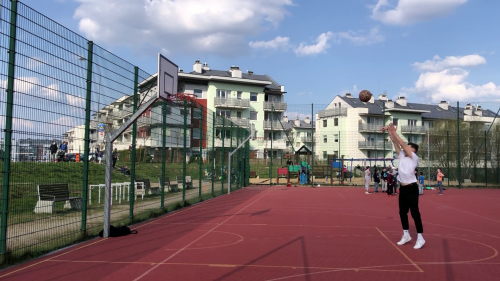

In [ ]:
# frame fetch test
frame = vs.read()[1]
frame = imutils.resize(frame, width=500)
cv2_imshow(frame)

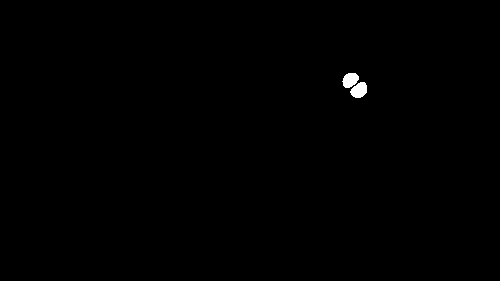

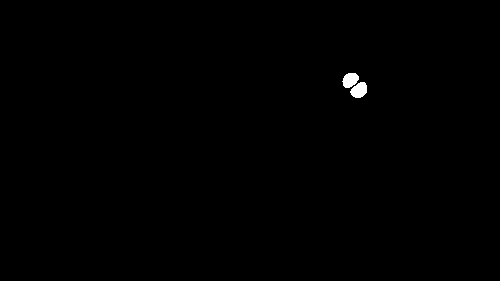

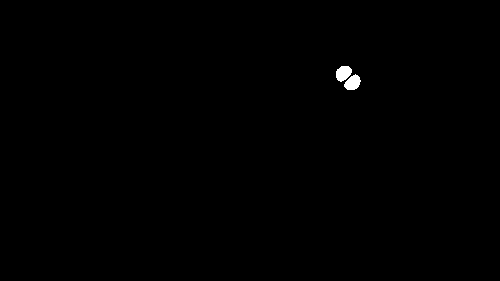

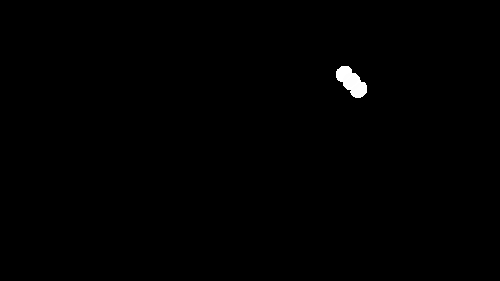

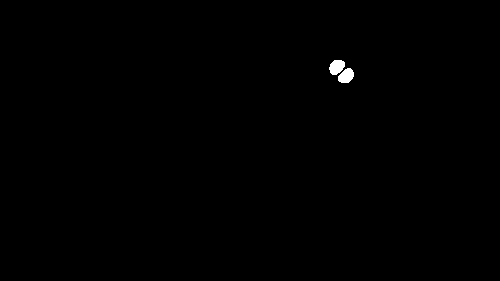

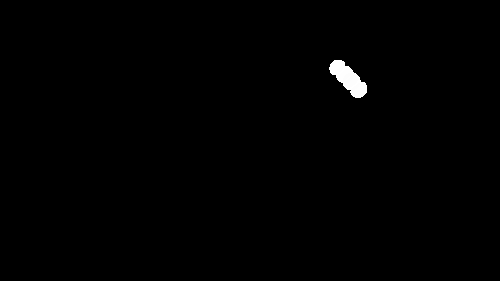

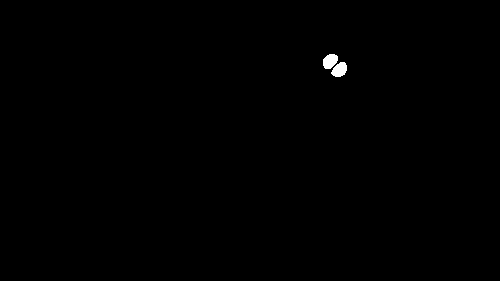

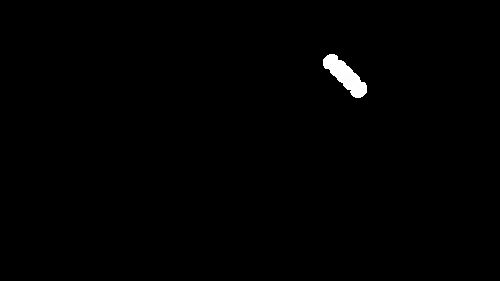

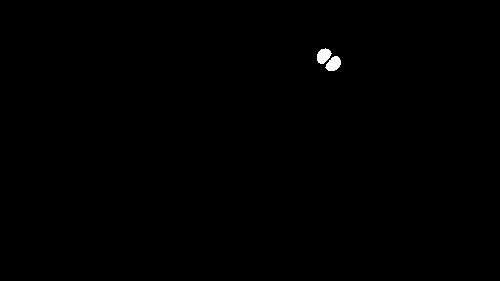

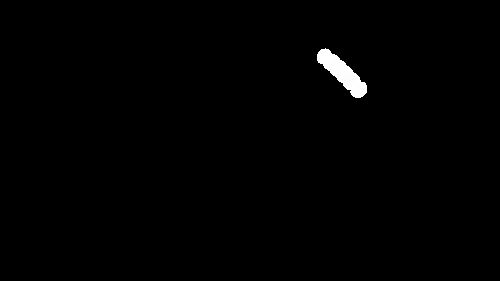

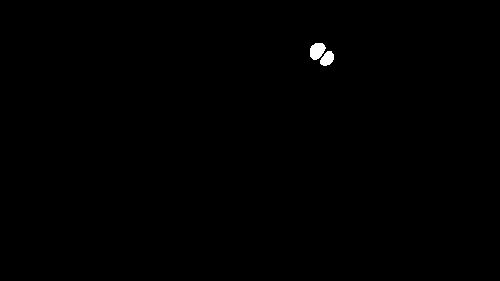

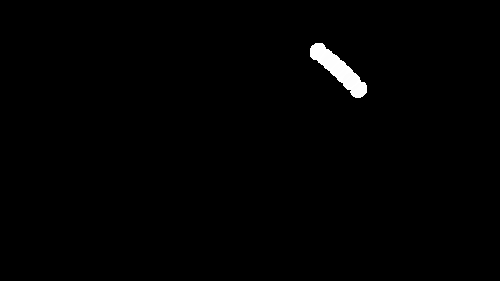

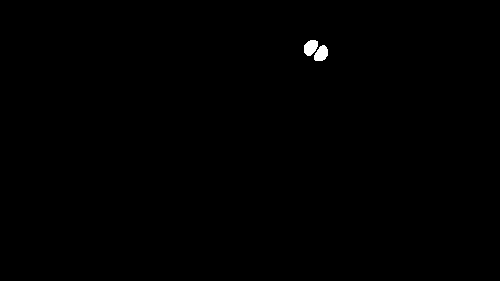

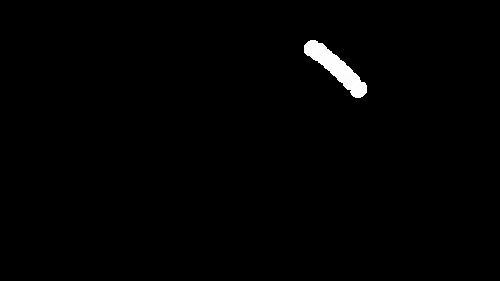

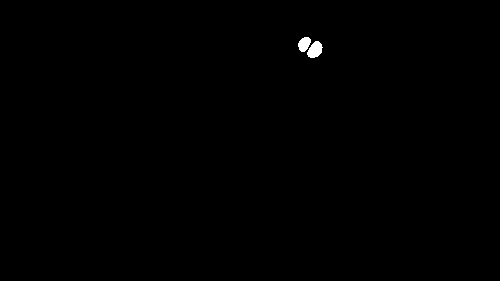

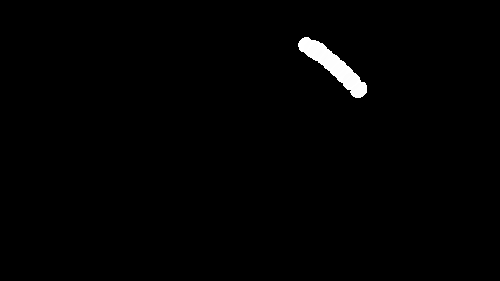

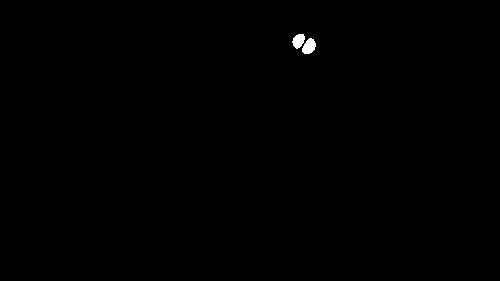

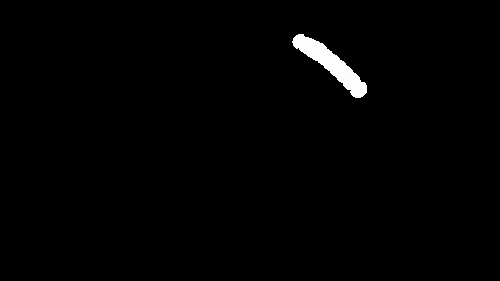

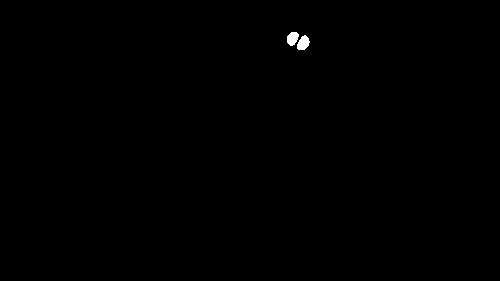

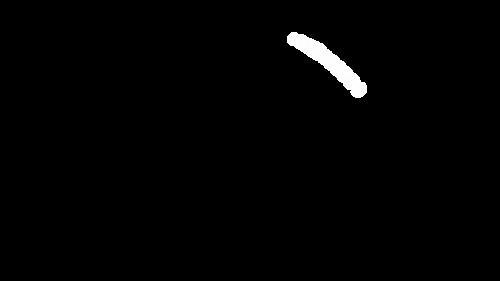

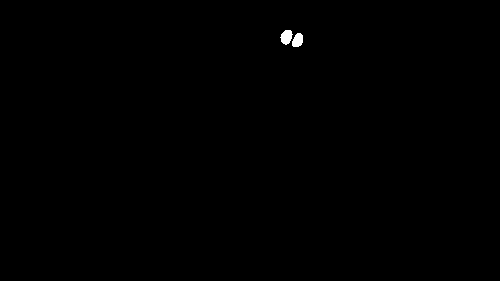

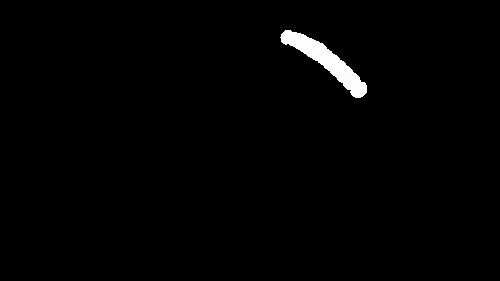

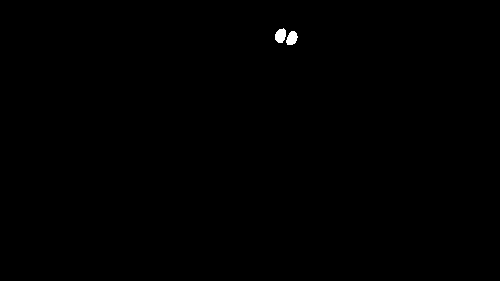

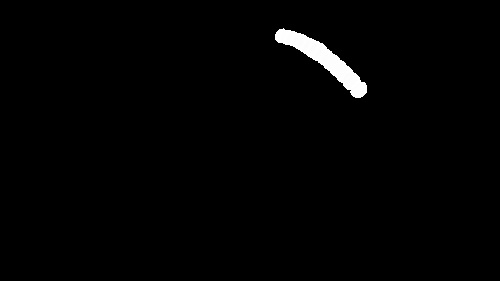

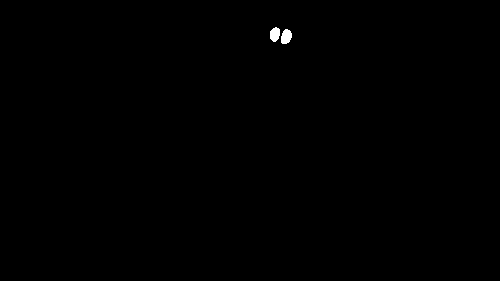

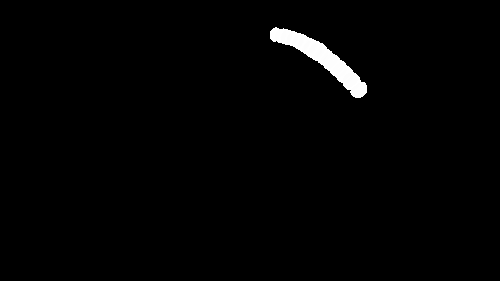

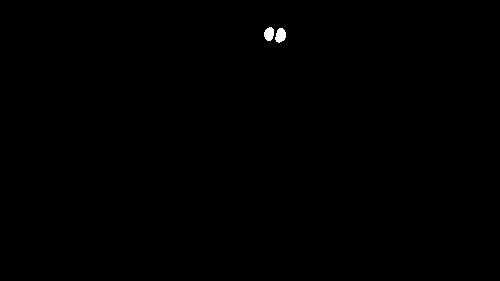

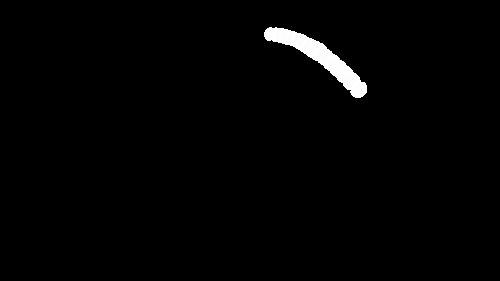

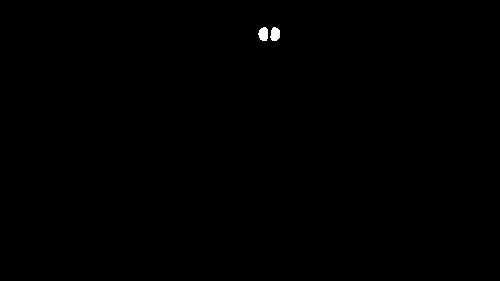

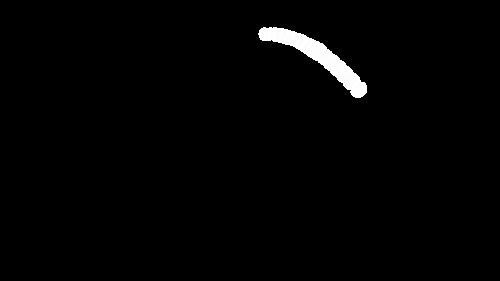

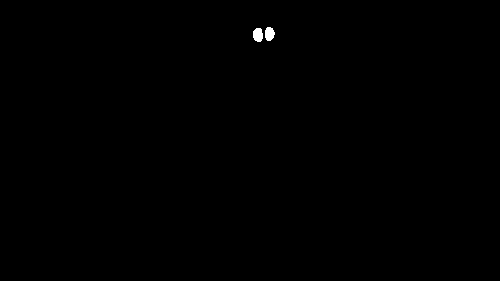

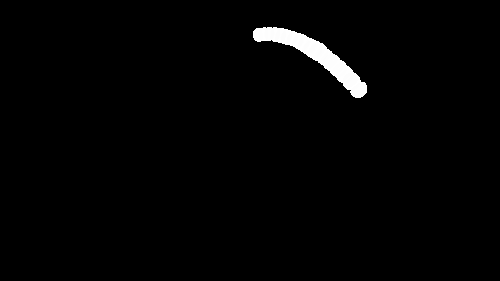

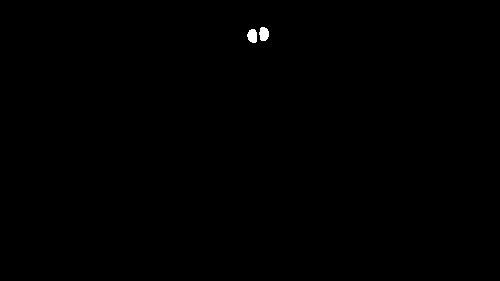

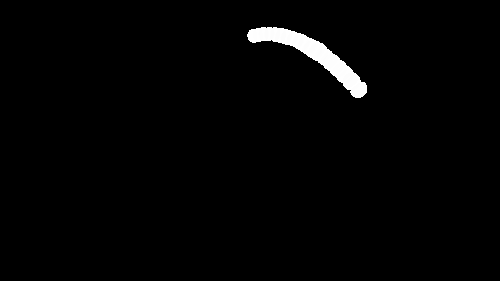

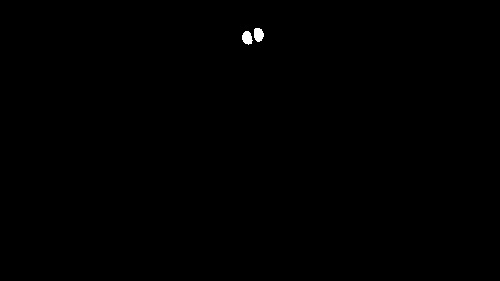

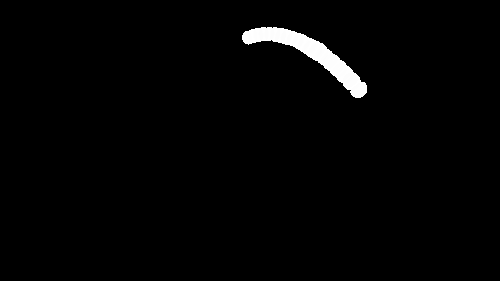

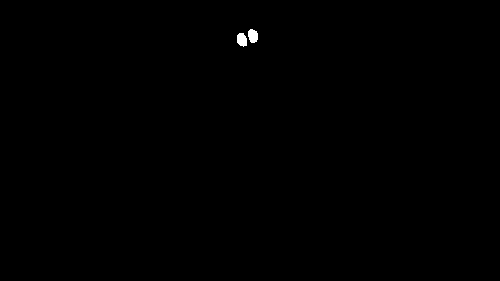

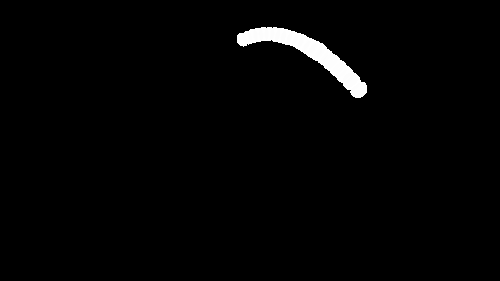

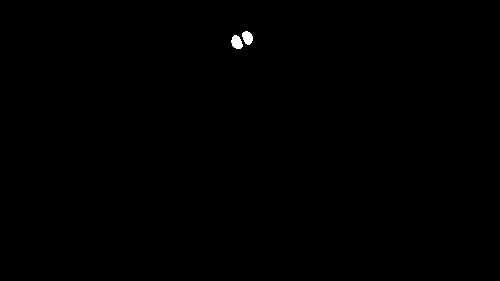

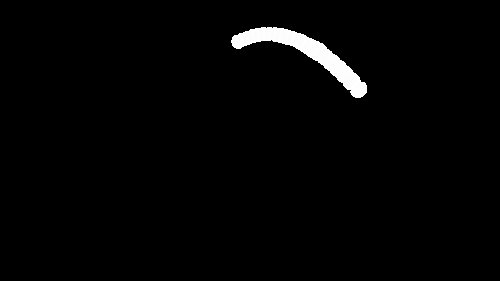

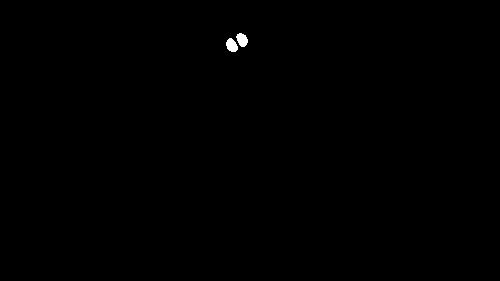

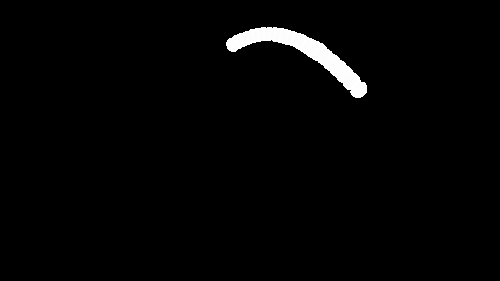

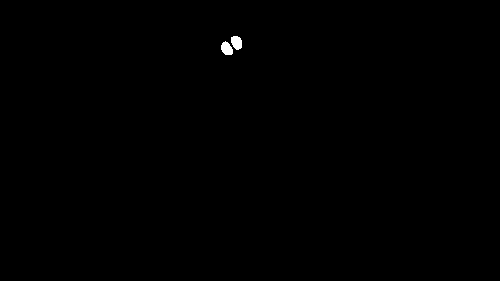

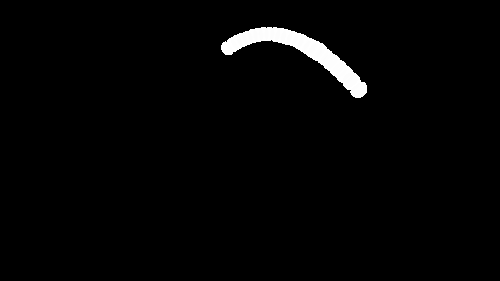

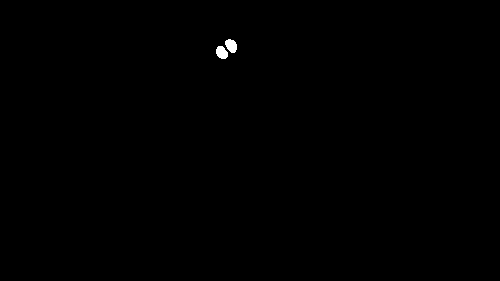

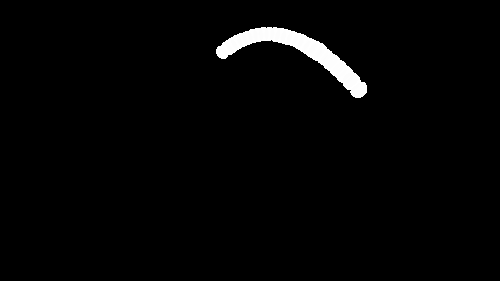

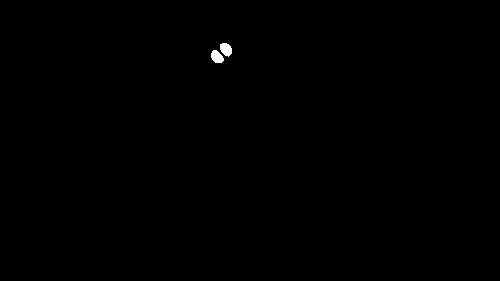

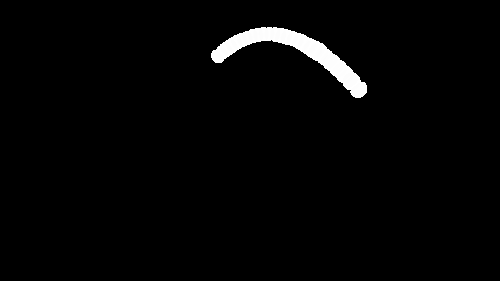

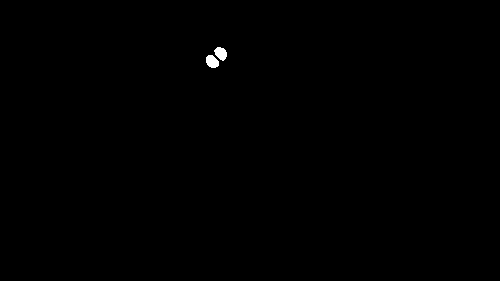

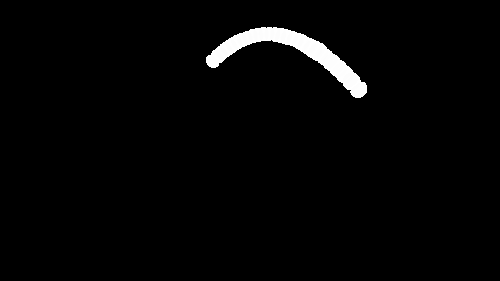

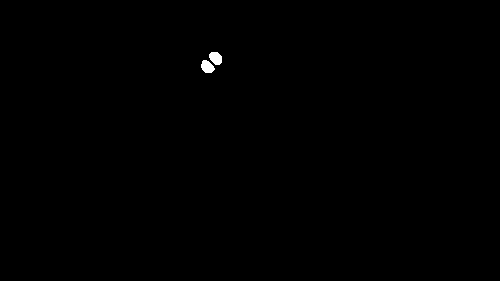

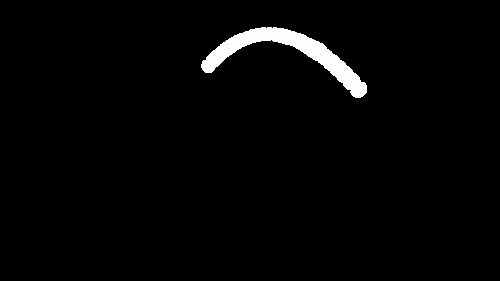

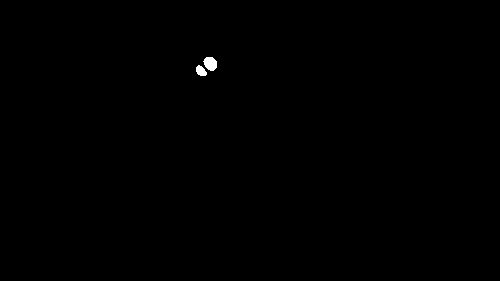

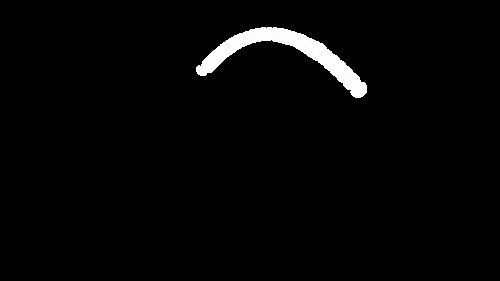

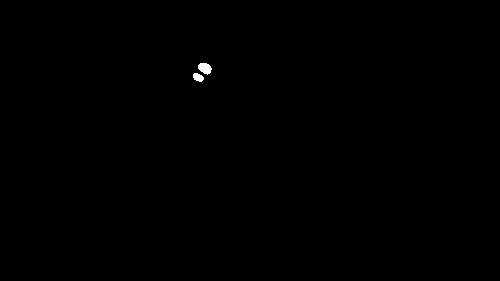

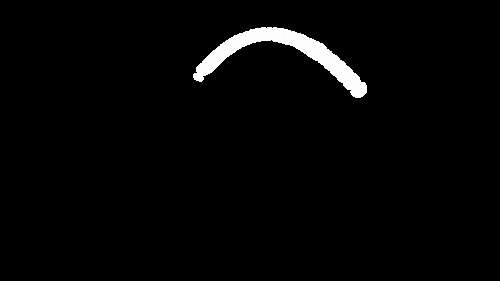

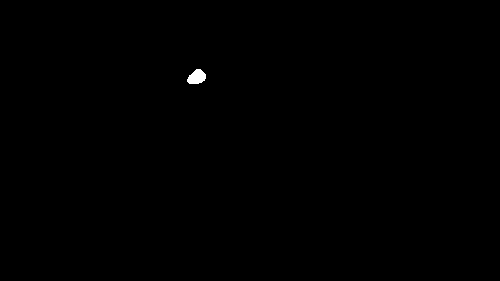

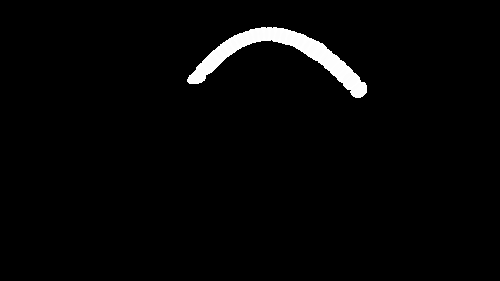

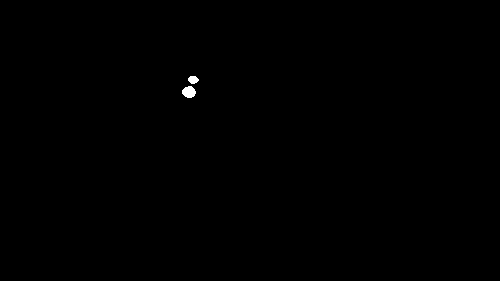

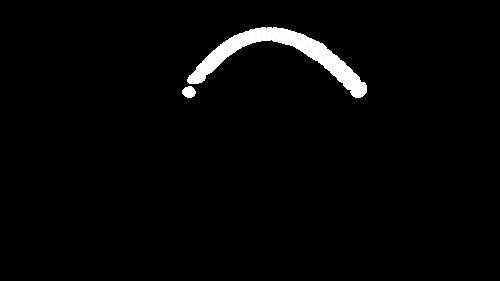

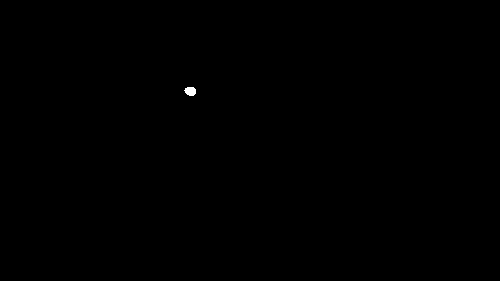

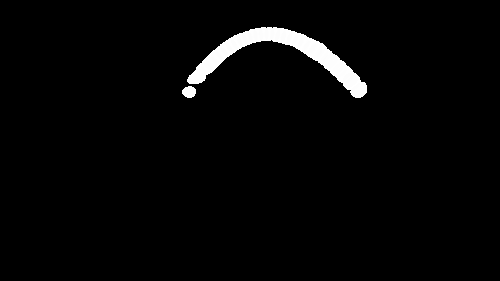

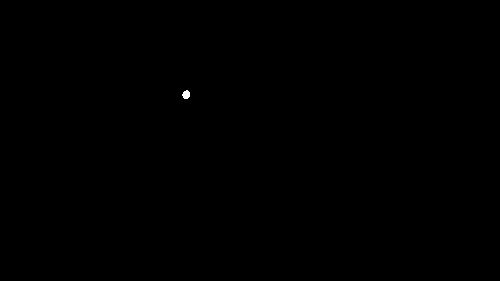

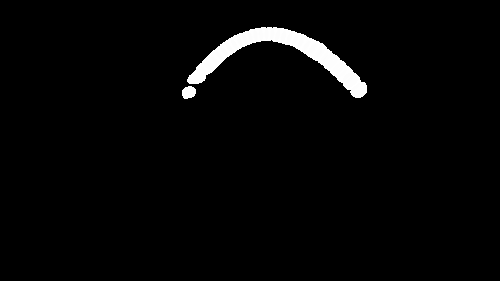

In [ ]:
while True:

	# fetch frame
	frame = vs.read()
	frame = frame[1]

  # if none left end loop
	if frame is None:
		break

	# check if first frame was fetched
	if firstFrame is not None:
		prevFrame = gray

	# change size, convert to grayscale and blur
	frame = imutils.resize(frame, width=500)
	gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
	gray = cv2.GaussianBlur(gray, (21, 21), 0)

	if firstFrame is None:
		firstFrame = gray
		continue

	# compute the difference between this and prev frame
	frameDelta = cv2.absdiff(prevFrame, gray)
 
	# threshold for motion detection
	thresh = cv2.threshold(frameDelta, 15, 255, cv2.THRESH_BINARY)[1]



	# sum of last 40 frames
	if resultAsSum is None:
		resultAsSum = thresh
	if len(framesSummed) > 40:
		resultAsSum += thresh
		framesSummed.append(thresh)
		resultAsSum -= framesSummed[0]
		framesSummed.pop(0)
	else:
		resultAsSum += thresh
		framesSummed.append(thresh)


	cv2_imshow(thresh)

	cv2_imshow(resultAsSum)
	key = cv2.waitKey(1) & 0xFF


# Representing the shot as data points

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as image
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
from numpy import asarray

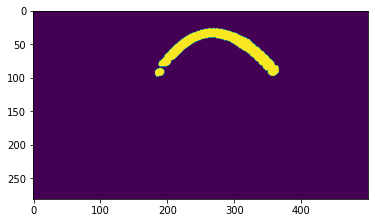

In [ ]:
plt.imshow(resultAsSum)
plt.show()

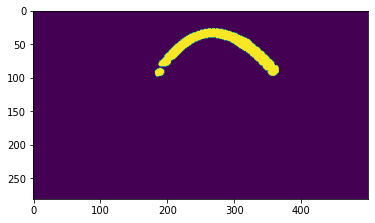

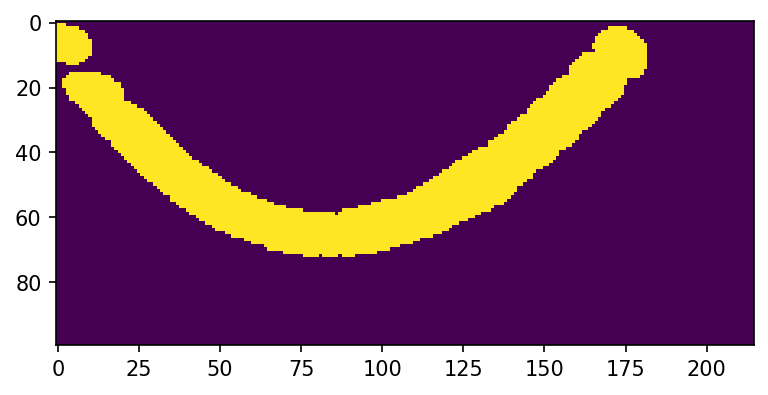

[[0 0 0 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(281, 500)
[[0, 1], [1, 1], [2, 1], [0, 2], [1, 2], [2, 2], [3, 2], [4, 2], [5, 2], [6, 2], [170, 2], [171, 2], [172, 2], [173, 2], [174, 2], [175, 2], [0, 3], [1, 3], [2, 3], [3, 3], [4, 3], [5, 3], [6, 3], [7, 3], [8, 3], [168, 3], [169, 3], [170, 3], [171, 3], [172, 3], [173, 3], [174, 3], [175, 3], [176, 3], [177, 3], [0, 4], [1, 4], [2, 4], [3, 4], [4, 4], [5, 4], [6, 4], [7, 4], [8, 4], [9, 4], [167, 4], [168, 4], [169, 4], [170, 4], [171, 4], [172, 4], [173, 4], [174, 4], [175, 4], [176, 4], [177, 4], [178, 4], [0, 5], [1, 5], [2, 5], [3, 5], [4, 5], [5, 5], [6, 5], [7, 5], [8, 5], [9, 5], [166, 5], [167, 5], [168, 5], [169, 5], [170, 5], [171, 5], [172, 5], [173, 5], [174, 5], [175, 5], [176, 5], [177, 5], [178, 5], [179, 5], [0, 6], [1, 6], [2, 6], [3, 6], [4, 6], [5, 6], [6, 6], [7, 6], [8, 6], [9, 6], [10, 6], [166, 6], [167, 6], [168, 6], [169, 6], [170, 6

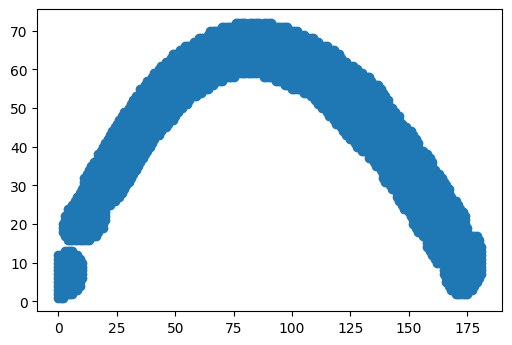

In [ ]:
image = resultAsSum
plt.imshow(image)

trail_frame = np.clip(image, 0, 1).astype(np.uint8)


x_lim = 100 
y_lim = 400 
plt.imshow(trail_frame)

cropped_trail = trail_frame[:x_lim, 185:y_lim][::-1,::1]
plt.figure(dpi=150)
plt.grid(False)

plt.imshow(cropped_trail)
plt.show()

# Tutaj testy
data = asarray(cropped_trail)
print(data)
print(trail_frame.shape)

points = []
for i in range(x_lim):
  for j in range(y_lim-185):
    if data[i][j] > 0:
      points.append([j, i])
print(points)


plt.figure(dpi=100)
xs = [point[0] for point in points]
ys = [point[1] for point in points]
plt.scatter(xs, ys)

# ------------- TESTY ---------------



In [ ]:
import tensorflow as tf

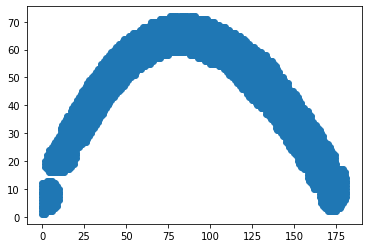

In [ ]:
plt.scatter(xs, ys)

#Trajectory Fitting

In [ ]:
# initializing force and angle variables
angle_variable = tf.Variable(40.0, name='angle_constant')
force_variable = tf.Variable(50.0, name='force_constant')

my_variables = [angle_variable, force_variable]

In [ ]:
# degrees to radians transform

def deg2rad(deg):
    pi_on_180 = 0.017453292519943295
    return deg * pi_on_180

def run_model(x):
  tf_lhs = x * tf.tan(deg2rad(angle_variable))
  tf_rhs_top = 9.8 * x ** 2
  tf_rhs_bottom = (2*(force_variable)**2) * (tf.cos( deg2rad(angle_variable))**2)
  output = tf_lhs - (tf_rhs_top / tf_rhs_bottom)
  return output

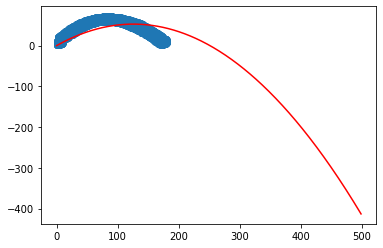

In [ ]:
plt.scatter(xs, ys)
plt.plot(np.arange(500), run_model(np.arange(500)),c='r')
plt.show()

In [ ]:
optimiser = tf.optimizers.Adam(learning_rate=1)

In [ ]:
for i in range(len(xs)):

  with tf.GradientTape() as tape:
    loss = tf.losses.mean_squared_error(ys, run_model(xs[i]))

  grads = tape.gradient(loss, my_variables)
  optimiser.apply_gradients(zip(grads, my_variables))

  # print values every 5 loops
  if (i % 5) == 0:
    print(my_variables[0].numpy() , my_variables[1].numpy())

ValueError: ignored

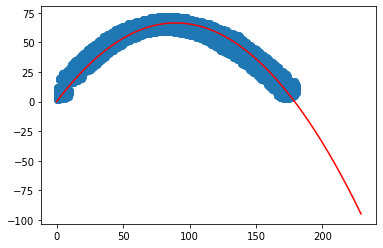

In [ ]:
# Manual data modification

angle_variable = tf.Variable(56.0, name='angle_constant')
force_variable = tf.Variable(43.5, name='force_constant')
# print(my_variables)

# Fitting
plt.scatter(xs, ys)
plt.plot(np.arange(230), run_model(np.arange(230)),c='r')
plt.show()

#Voilà! 
##The angle is shown as "numpy = {arc}": 



In [ ]:
print(angle_variable)

<tf.Variable 'angle_constant:0' shape=() dtype=float32, numpy=56.0>
